In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

## 2D Poisson PDE

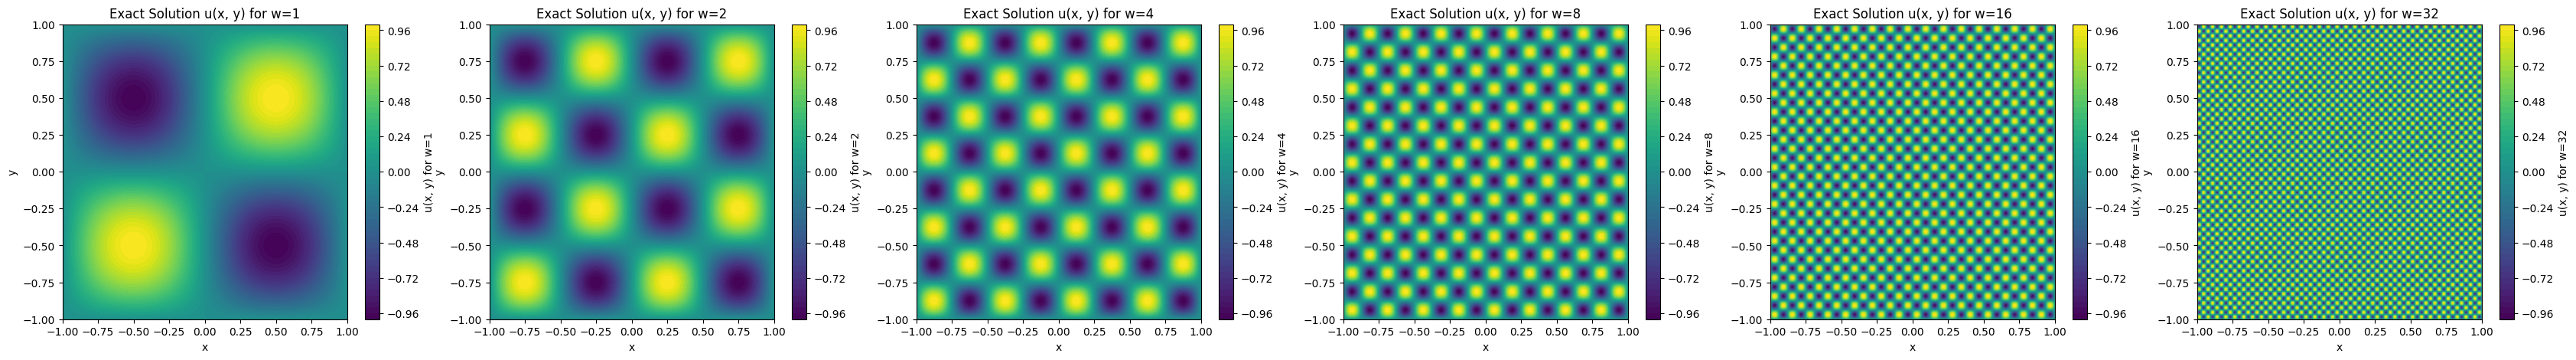

In [3]:
domain = [-1, 1]
n = 256
x = np.linspace(domain[0], domain[1], n)
y = np.linspace(domain[0], domain[1], n)
dx = (domain[1] - domain[0]) / (n - 1)
dy = dx

X, Y = np.meshgrid(x, y)

def compute_forcing(w, X, Y):
    return 2 * (np.pi**2) * (w**2) * np.sin(np.pi * w * X) * np.sin(np.pi * w * Y)

def exact_solution(w, X, Y):
    return np.sin(np.pi * w * X) * np.sin(np.pi * w * Y)

w_values = [1, 2, 4, 8, 16, 32]
plt.subplots(1, len(w_values), figsize=(7*len(w_values), 5))
for i, w in enumerate(w_values):
    f = compute_forcing(w, X, Y)
    u_exact = exact_solution(w, X, Y)
    data = {
        "x": X.flatten(),
        "y": Y.flatten(),
        "f": f.flatten(),
        "u": u_exact.flatten()
    }
    df = pd.DataFrame(data)
    df.to_csv(f"poisson/poisson_w{w}.csv", index=False)

    plt.subplot(1, len(w_values), i + 1)
    plt.contourf(X, Y, u_exact, levels=50, cmap="viridis")
    plt.colorbar(label=f"u(x, y) for w={w}")
    plt.title(f"Exact Solution u(x, y) for w={w}")
    plt.xlabel("x")
    plt.ylabel("y")
plt.show()

## Helmholtz

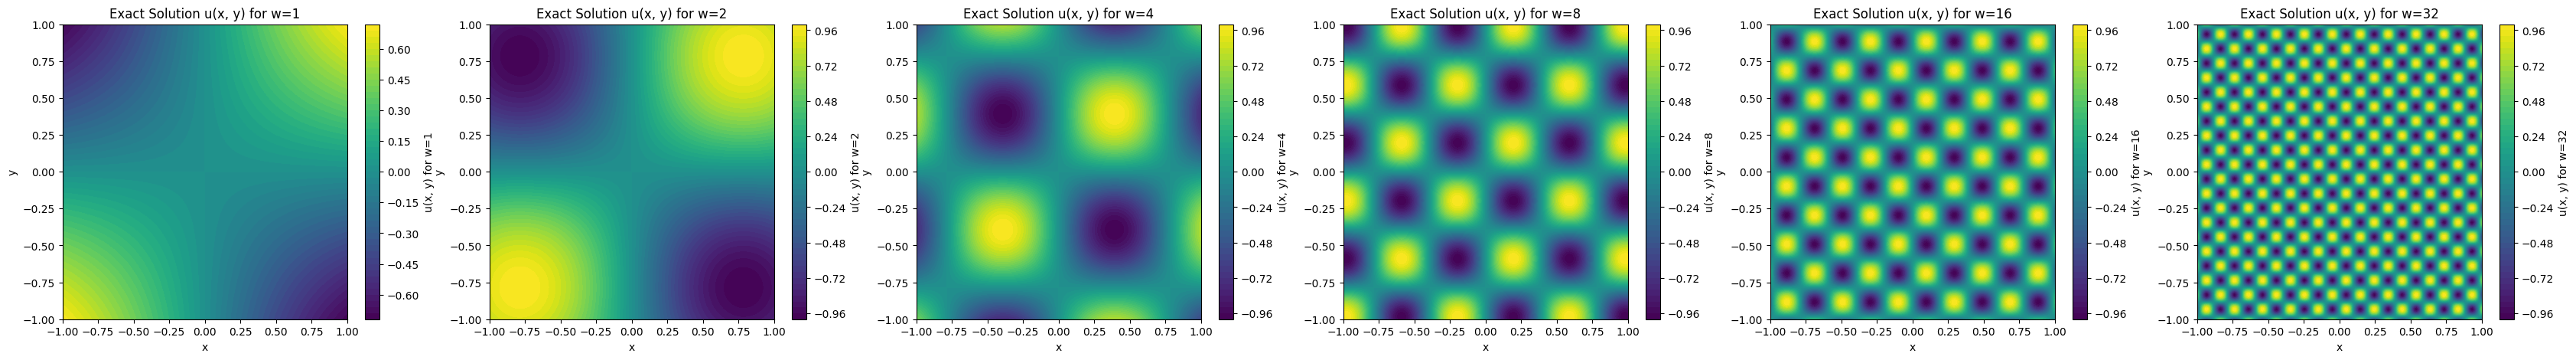

In [4]:
domain = [-1, 1]
n = 256
x = np.linspace(domain[0], domain[1], n)
y = np.linspace(domain[0], domain[1], n)
dx = (domain[1] - domain[0]) / (n - 1)
dy = dx

X, Y = np.meshgrid(x, y)

def compute_forcing(w, X, Y, kappa=1):
    return (kappa - 2 * np.pi**2 * w**2) * np.sin(np.pi * w * X) * np.sin(np.pi * w * Y)

def exact_solution(w, X, Y):
    return np.sin(w * X) * np.sin(w * Y)

w_values = [1, 2, 4, 8, 16, 32]
plt.subplots(1, len(w_values), figsize=(7*len(w_values), 5))
for i, w in enumerate(w_values):
    f = compute_forcing(w, X, Y)
    u_exact = exact_solution(w, X, Y)
    data = {
        "x": X.flatten(),
        "y": Y.flatten(),
        "f": f.flatten(),
        "u": u_exact.flatten()
    }
    df = pd.DataFrame(data)
    df.to_csv(f"helmholtz/helmholtz_w{w}.csv", index=False)

    plt.subplot(1, len(w_values), i + 1)
    plt.contourf(X, Y, u_exact, levels=50, cmap="viridis")
    plt.colorbar(label=f"u(x, y) for w={w}")
    plt.title(f"Exact Solution u(x, y) for w={w}")
    plt.xlabel("x")
    plt.ylabel("y")
plt.show()

## Allen-Cahn

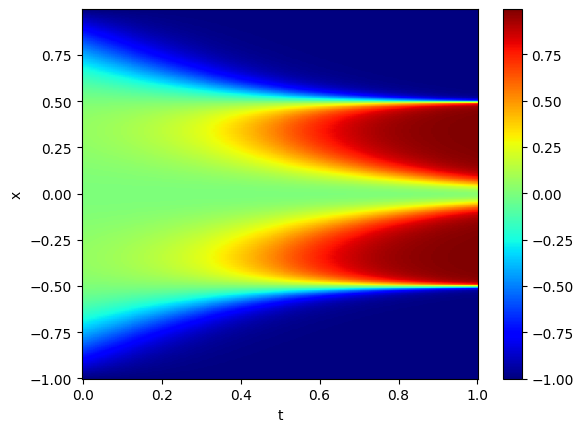

In [5]:
data = scipy.io.loadmat("allen_cahn.mat")
usol = data["uu"]

t_star = data["tt"][0]
x_star = data["x"][0]
TT, XX = np.meshgrid(t_star, x_star)

plt.pcolor(TT, XX, usol, cmap="jet")
plt.colorbar()
plt.xlabel("t")
plt.ylabel("x")
plt.show()